<a href="https://colab.research.google.com/github/Theophine/Machine_Learning/blob/master/KNN_diabeties_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIABETES PREDICTION 

##Problem Statement 
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

##Business Goals 
Based on the result of the model built, the Governemnt can take active steps in ensuring that it allocates the right amount of funds in treatment of Diabetes patients. 

#Importing file from local drive

make sure to start with the code below which will then prompt you to select your file from your drive

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (2).csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

In [ ]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings("ignore")

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 20)


Inspect your dataset

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1


In [ ]:
df.shape

(768, 9)

See that the datatypes are correct

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From the above inpsection, the data types are accurate

View the summary statistics

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000
mean,3.8451,120.8945,69.1055,20.5365,79.7995,31.9926,0.4719,33.2409,0.3490
std,3.3696,31.9726,19.3558,15.9522,115.2440,7.8842,0.3313,11.7602,0.4770
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780,21.0000,0.0000
25%,1.0000,99.0000,62.0000,0.0000,0.0000,27.3000,0.2437,24.0000,0.0000
50%,3.0000,117.0000,72.0000,23.0000,30.5000,32.0000,0.3725,29.0000,0.0000
75%,6.0000,140.2500,80.0000,32.0000,127.2500,36.6000,0.6262,41.0000,1.0000
max,17.0000,199.0000,122.0000,99.0000,846.0000,67.1000,2.4200,81.0000,1.0000


Observations 
Blood pressure cannot be zero 
BMI 

From the above, there are zero values in some columns and this indicates missing values and thus have to be fixed. These missing values can be seen in:


*   Pregnancies
*   Glucose
*   Blood Pressure 
*   Skin Thickness
*   BMI


##Data cleaning 

In [ ]:
df_new = df.copy()

Given that our entire dataset is numerical, Two challenges we are likely going to face are: 



1.   Treating missing values
2.   Outlier removal 

Replace all zeros with NaNs

In [ ]:
df_new[df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0 ] = np.nan

Check to see how many null values there are in the dataFrame

In [ ]:
df_new.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df_new['Outcome'].value_counts(dropna = False)

0    500
1    268
Name: Outcome, dtype: int64

##Fixing missing values 

We would have to use a form of iteration to fix the missing values

###Fix the BMI missing values

In [ ]:
df_clean1 = df[['Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'BMI']]
df_clean1.shape

(768, 4)

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
KNNImputer().fit(df_clean1).transform(df_clean1)

array([[50.   ,  6.   ,  0.627, 33.6  ],
       [31.   ,  1.   ,  0.351, 26.6  ],
       [32.   ,  8.   ,  0.672, 23.3  ],
       ...,
       [30.   ,  5.   ,  0.245, 26.2  ],
       [47.   ,  1.   ,  0.349, 30.1  ],
       [23.   ,  1.   ,  0.315, 30.4  ]])

In [ ]:
df_clean1.isna().sum()

Age                         0
Pregnancies                 0
DiabetesPedigreeFunction    0
BMI                         0
dtype: int64

###Fix the Glucose missisng values 

In [ ]:
df_glucose = df_clean1.join(df_new[['Glucose']])
df_glucose.isna().sum()

Age                         0
Pregnancies                 0
DiabetesPedigreeFunction    0
BMI                         0
Glucose                     5
dtype: int64

In [ ]:
df_glucose.shape

(768, 5)

In [ ]:
df_glucose = KNNImputer().fit(df_glucose).transform(df_glucose)

In [ ]:
df_glucose = pd.DataFrame(df_glucose,columns = ['Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'BMI', 'Glucose'])

In [ ]:
#inspect the column
df_glucose.isna().sum()

Age                         0
Pregnancies                 0
DiabetesPedigreeFunction    0
BMI                         0
Glucose                     0
dtype: int64

###Fix the bloodpressure missing values 

In [ ]:
df_bloodpressure = df_glucose.join(df_new[['BloodPressure']])
df_bloodpressure.head()

,Age,Pregnancies,DiabetesPedigreeFunction,BMI,Glucose,BloodPressure
0,50.0000,6.0000,0.6270,33.6000,148.0000,72.0000
1,31.0000,1.0000,0.3510,26.6000,85.0000,66.0000
2,32.0000,8.0000,0.6720,23.3000,183.0000,64.0000
3,21.0000,1.0000,0.1670,28.1000,89.0000,66.0000
4,33.0000,0.0000,2.2880,43.1000,137.0000,40.0000


In [ ]:
df_bloodpressure.isna().sum()

Age                          0
Pregnancies                  0
DiabetesPedigreeFunction     0
BMI                          0
Glucose                      0
BloodPressure               35
dtype: int64

In [ ]:
df_bloodpressure = KNNImputer().fit(df_bloodpressure).transform(df_bloodpressure)

In [ ]:
df_bloodpressure = pd.DataFrame(df_bloodpressure,columns = ['Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'BMI', 'Glucose', 'BloodPressure'])

In [ ]:
df_bloodpressure.isna().sum()

Age                         0
Pregnancies                 0
DiabetesPedigreeFunction    0
BMI                         0
Glucose                     0
BloodPressure               0
dtype: int64

###Fix the skinthickness missing values 

In [ ]:
df_skin = df_bloodpressure.join(df_new[['SkinThickness']])
df_skin.head()

,Age,Pregnancies,DiabetesPedigreeFunction,BMI,Glucose,BloodPressure,SkinThickness
0,50.0000,6.0000,0.6270,33.6000,148.0000,72.0000,35.0000
1,31.0000,1.0000,0.3510,26.6000,85.0000,66.0000,29.0000
2,32.0000,8.0000,0.6720,23.3000,183.0000,64.0000,nan
3,21.0000,1.0000,0.1670,28.1000,89.0000,66.0000,23.0000
4,33.0000,0.0000,2.2880,43.1000,137.0000,40.0000,35.0000


In [ ]:
df_skin = KNNImputer().fit(df_skin).transform(df_skin)

In [ ]:
df_skin = pd.DataFrame(df_skin,columns = ['Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'BMI', 'Glucose', 'BloodPressure', 'SkinThickness'])

In [ ]:
df_skin.isna().sum()

Age                         0
Pregnancies                 0
DiabetesPedigreeFunction    0
BMI                         0
Glucose                     0
BloodPressure               0
SkinThickness               0
dtype: int64

###Fix the insulin missing values 

In [ ]:
df_insulin = df_skin.join(df_new[['Insulin']])
df_insulin.head()

,Age,Pregnancies,DiabetesPedigreeFunction,BMI,Glucose,BloodPressure,SkinThickness,Insulin
0,50.0000,6.0000,0.6270,33.6000,148.0000,72.0000,35.0000,nan
1,31.0000,1.0000,0.3510,26.6000,85.0000,66.0000,29.0000,nan
2,32.0000,8.0000,0.6720,23.3000,183.0000,64.0000,25.8000,nan
3,21.0000,1.0000,0.1670,28.1000,89.0000,66.0000,23.0000,94.0000
4,33.0000,0.0000,2.2880,43.1000,137.0000,40.0000,35.0000,168.0000


In [ ]:
df_insulin = KNNImputer().fit(df_insulin ).transform(df_insulin)

In [ ]:
df_insulin = pd.DataFrame(df_insulin,columns = ['Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'BMI', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'])

In [ ]:
df_insulin.isna().sum()

Age                         0
Pregnancies                 0
DiabetesPedigreeFunction    0
BMI                         0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
dtype: int64

In [ ]:
df_diabetes = df_insulin.join(df_new[['Outcome']])

In [ ]:
df_diabetes.head()

,Age,Pregnancies,DiabetesPedigreeFunction,BMI,Glucose,BloodPressure,SkinThickness,Insulin,Outcome
0,50.0000,6.0000,0.6270,33.6000,148.0000,72.0000,35.0000,169.0000,1
1,31.0000,1.0000,0.3510,26.6000,85.0000,66.0000,29.0000,58.6000,0
2,32.0000,8.0000,0.6720,23.3000,183.0000,64.0000,25.8000,193.8000,1
3,21.0000,1.0000,0.1670,28.1000,89.0000,66.0000,23.0000,94.0000,0
4,33.0000,0.0000,2.2880,43.1000,137.0000,40.0000,35.0000,168.0000,1


In [ ]:
df_diabetes.shape

(768, 9)

##check for outliers

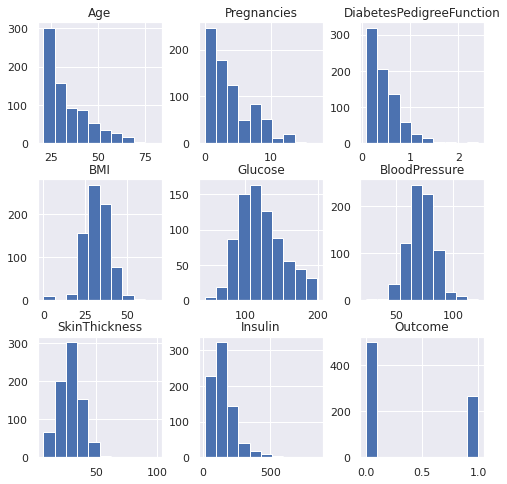

In [ ]:
df_diabetes.hist();

From the above, Skin Thickness seems to have an outlier. We can further inspect it. 

In [ ]:
df_diabetes['SkinThickness'].kurtosis()

3.5147771453696124

###fixing the outlier for skinThickness

In [ ]:
mean = df_diabetes['SkinThickness'].mean()
std = df_diabetes['SkinThickness'].std() * 3
std

28.37560168925381

In [ ]:
lower_bound = mean - std 
upper_bound = mean + std

In [ ]:
df_diabetes['SkinThickness']

0     35.0000
1     29.0000
2     25.8000
3     23.0000
4     35.0000
        ...  
763   48.0000
764   27.0000
765   23.0000
766   35.2000
767   31.0000
Name: SkinThickness, Length: 768, dtype: float64

In [ ]:
mask = df_diabetes['SkinThickness'][(df_diabetes['SkinThickness'] > lower_bound) & (df_diabetes['SkinThickness'] < upper_bound)]
mask
df_final = df_diabetes[df_diabetes['SkinThickness'].isin(mask)]
df_final.head()

,Age,Pregnancies,DiabetesPedigreeFunction,BMI,Glucose,BloodPressure,SkinThickness,Insulin,Outcome
0,50.0000,6.0000,0.6270,33.6000,148.0000,72.0000,35.0000,169.0000,1
1,31.0000,1.0000,0.3510,26.6000,85.0000,66.0000,29.0000,58.6000,0
2,32.0000,8.0000,0.6720,23.3000,183.0000,64.0000,25.8000,193.8000,1
3,21.0000,1.0000,0.1670,28.1000,89.0000,66.0000,23.0000,94.0000,0
4,33.0000,0.0000,2.2880,43.1000,137.0000,40.0000,35.0000,168.0000,1


In [ ]:
df_final.shape

(765, 9)

inspect the entire dataframe again 

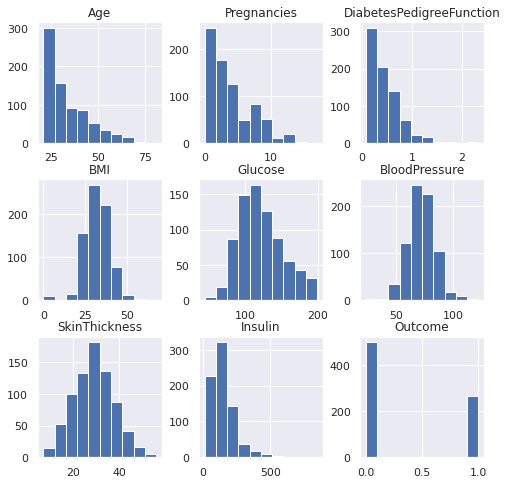

In [ ]:
df_final.hist();

##Exploratory data analysis

First, we check to see if all the variables are useful for the classification task

In [ ]:
def plot_box(variable, dataframe):
  for i in variable:
    fig, ax = plt.subplots(figsize = (8, 5))
    sns.boxplot('Outcome', i, data = dataframe);
    plt.title('boxplot of Outcome against ' + str(i))
    plt.show();



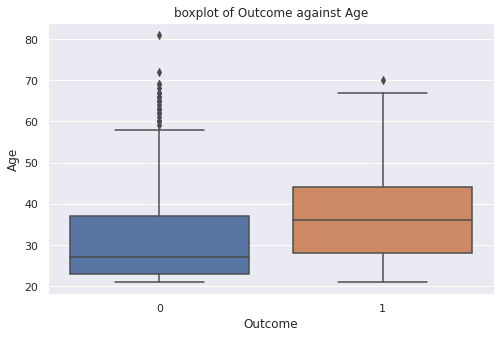

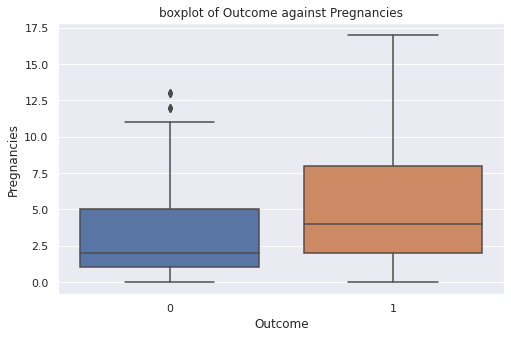

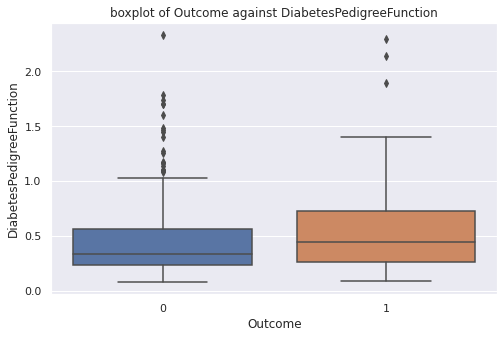

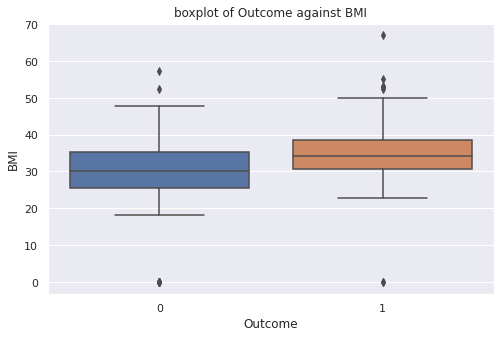

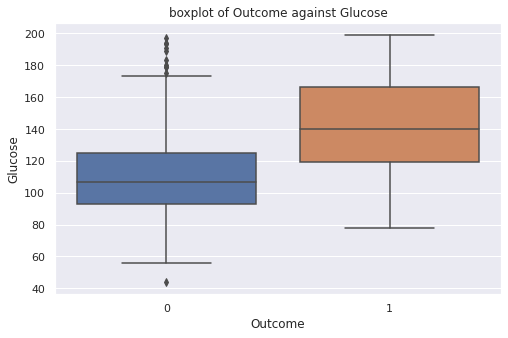

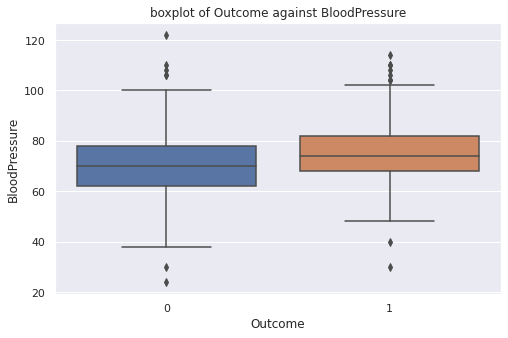

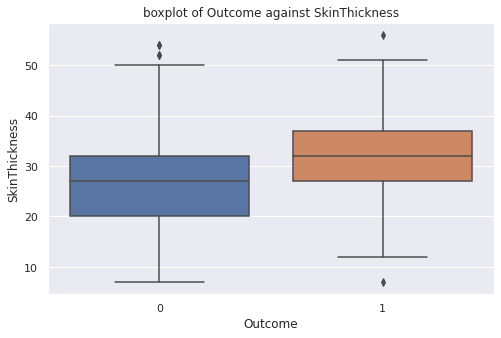

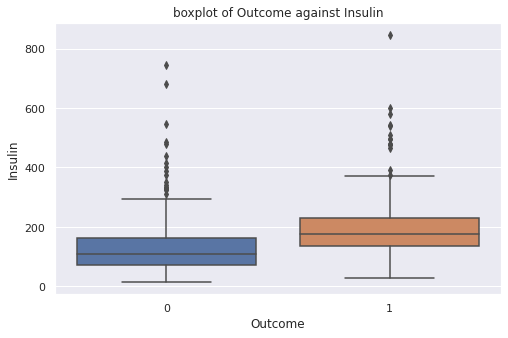

In [ ]:
lists = ['Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'BMI', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
plot_box(lists, df_final)

From the above boxplot, it shows that all the variables are important for the classification task. However, diabetes pedigreefunction have almost the same median for the two classes. 

If after building out model and accuracy is affected, we might consider removing this column. 

###heatmap of the entire dataset

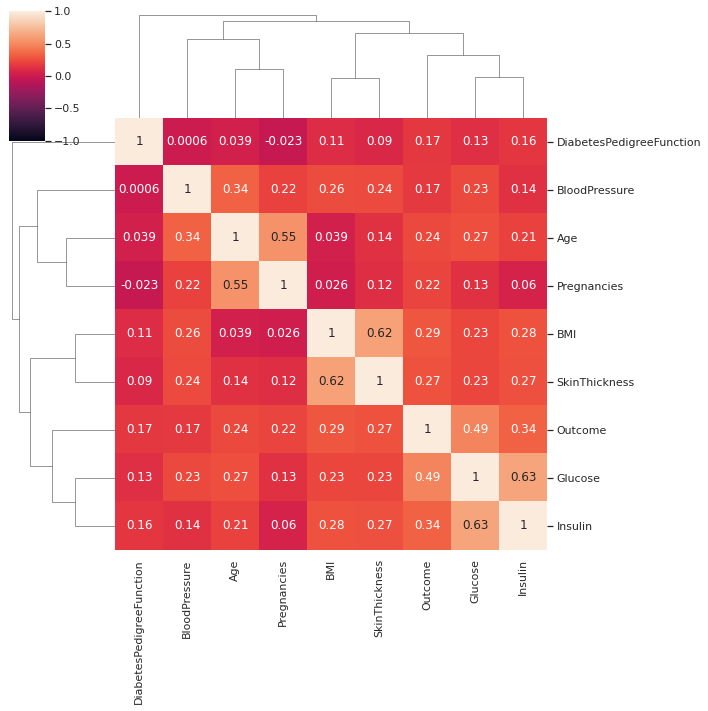

In [ ]:
sns.clustermap(df_final.corr(), annot = True, vmin = -1, vmax = 1);

The heatmap is not so necessary. It is just for the viewer to see the corerlation amongst all the variables. 

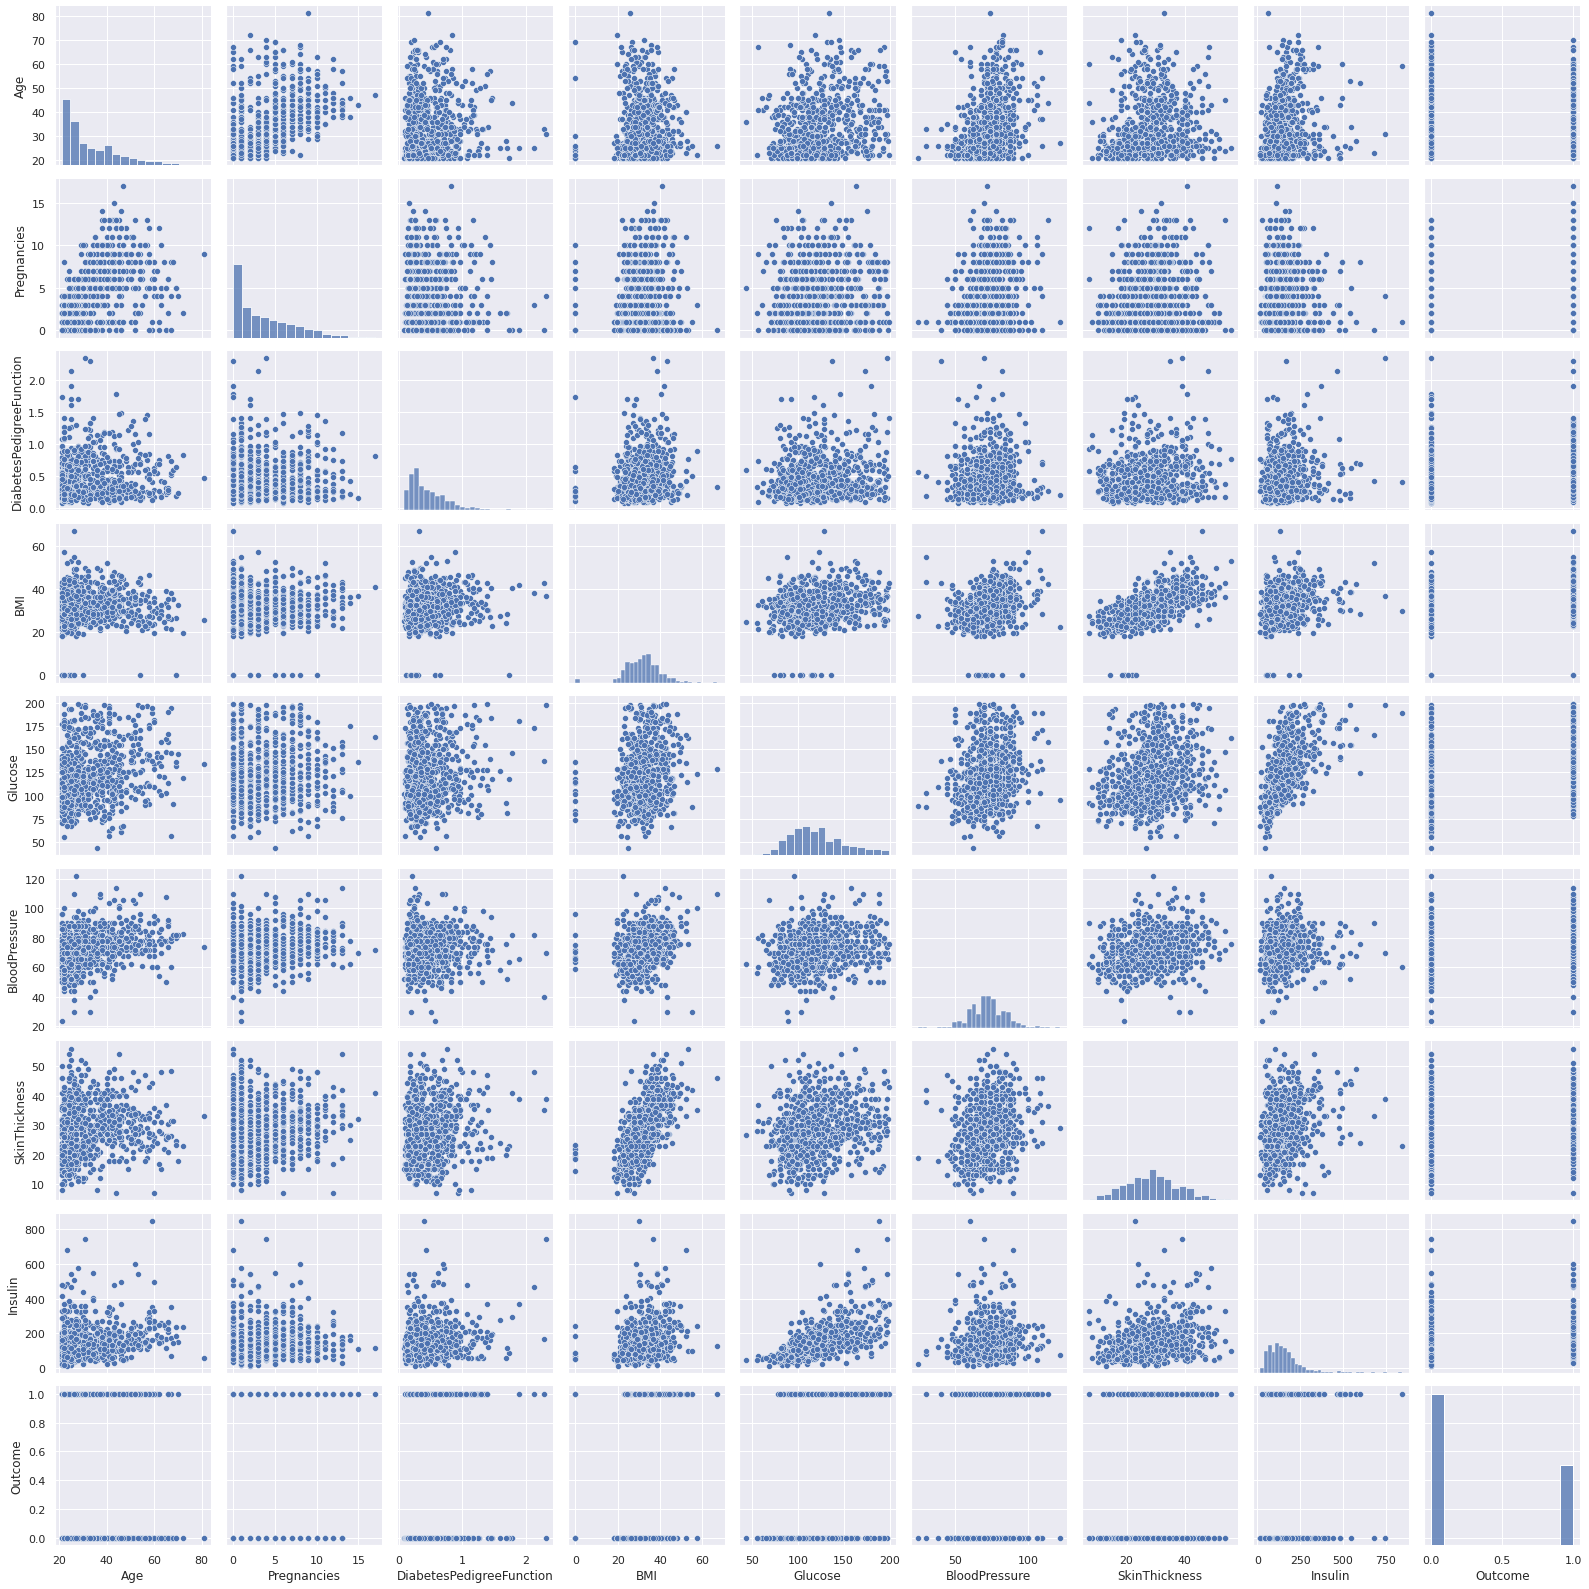

In [ ]:
sns.pairplot(df_final);

###Visualization of the age groups of the participants

In [ ]:
has_diabetes = df_final[df_final['Outcome'] ==1]
no_diabetes = df_final[df_final['Outcome'] == 0]

Text(0.5, 1.0, 'Age Distribution of people without diabetes')

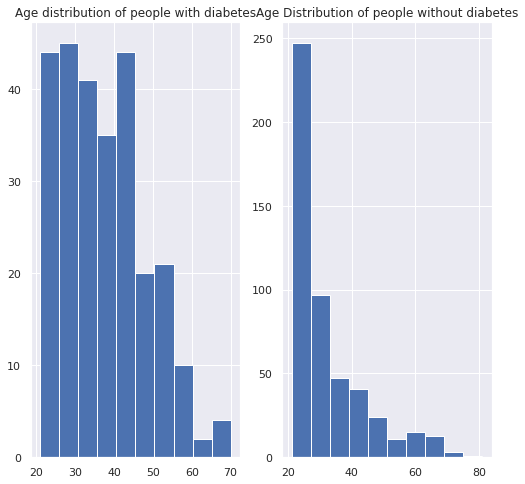

In [ ]:
plt.subplot(1, 2, 1)
has_diabetes['Age'].hist()
plt.title('Age distribution of people with diabetes')
plt.subplots_adjust(left = 0.1, right = 0.9)

plt.subplot(1, 2, 2)
no_diabetes['Age'].hist()
plt.title('Age Distribution of people without diabetes')

##Model Building Stage

In [ ]:
from mlxtend.plotting import plot_decision_regions    #for plotting the decision region 
from sklearn.neighbors import KNeighborsClassifier    #classifier 
from sklearn.feature_selection import SelectKBest, chi2, f_classif   # for selecting the best features 
from sklearn.metrics import make_scorer  #for setting our scoring parameter 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report, f1_score
from sklearn.pipeline import Pipeline   #our pipeline 
from sklearn.impute import SimpleImputer
from sklearn.utils import resample   #for data balancing 
from sklearn.preprocessing import StandardScaler   #for scaling all the datapoints 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


##Decision Boundary 

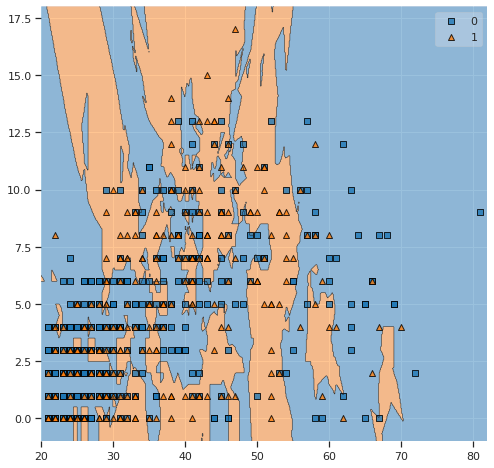

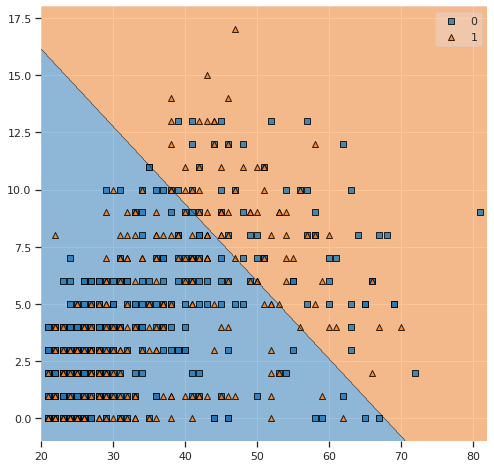

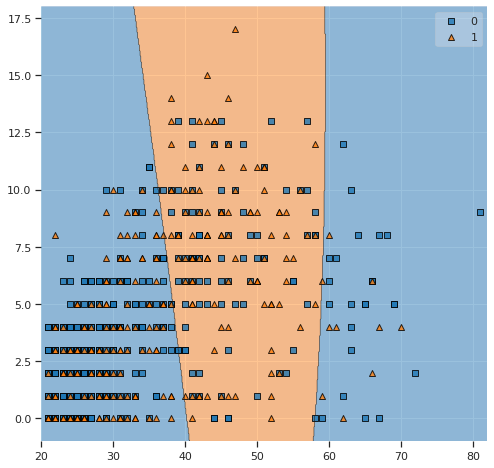

In [ ]:
classifier =  [KNeighborsClassifier(n_jobs = -1), LogisticRegression(random_state = 42), SVC()]

set_1 = np.array(df_final.loc[:, 'Age': 'Pregnancies'])
set_2 = np.array(df_final.loc[:, 'BMI': 'Insulin'])
y = np.array(df_final['Outcome'])

for model in classifier: 
  model.fit(set_1, y)
  plot_decision_regions(set_1, y, model)
  plt.show();

From the above, the decision boundary show that it is definitely a non-linear case and should be handled using a non-linear model

##Splitting your dataset

In [ ]:
X = df_final.drop('Outcome', axis = 1)
y = df_final[['Outcome']]

In [ ]:
X.shape, y.shape

((765, 8), (765, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42, stratify = y)

In [ ]:
X_train.shape

(688, 8)

Here, I am defining my scorer and how many shuffles I want

In [ ]:
scorer = make_scorer(f1_score, average = 'weighted')

In [ ]:
shuffle = StratifiedKFold(shuffle= True)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

##Model Comparison

In [ ]:
for i in classifier:
  score = np.mean(cross_val_score(i, X, y, scoring = scorer, cv = shuffle))
  print('The result of ', i , ' is ', str(score))
  print(' ')


The result of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')  is  0.7036424449449878
 
The result of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)  is  0.7531412229041218
 
The result of  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)  is  0.7359635520056218
 


##Fixing Data Imbalance 

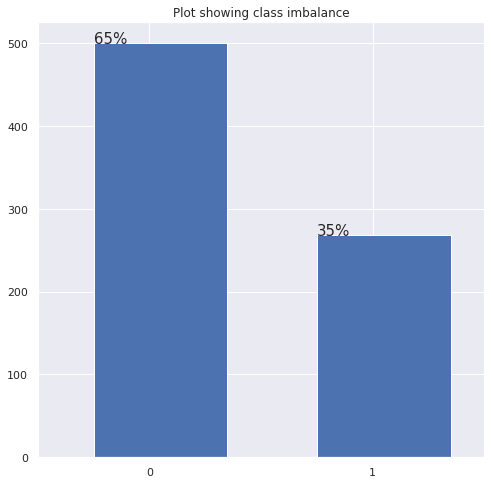

In [ ]:
ax = df['Outcome'].value_counts().plot.bar();
plt.xticks(rotation = 0)
plt.title('Plot showing class imbalance')

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    
    i.set_width(.6)
    
    x, y = i.get_xy()
    
    ax.annotate('{:.0%}'.format(height/765), (x, y + height + 0.3)).set_fontsize(15) 



In [ ]:
sample = pd.concat([X_train, y_train], axis = 1)

higher = sample[sample['Outcome'] == 0]
lower = sample[sample['Outcome'] == 1]

downsampled_sample = resample(higher, replace = False, n_samples = len(lower), random_state = 42)
new_sample = pd.concat([downsampled_sample, lower])

new_sample['Outcome'].value_counts()

1    239
0    239
Name: Outcome, dtype: int64

In [ ]:
X_train, y_train = new_sample.drop('Outcome', axis = 1), new_sample['Outcome']

we can now build the model and tune the hyperparameters since as can be seen above, the model when applied to cross_val_score yielded an F1_score of 0.7025

In [ ]:
scaler = StandardScaler()
kbest = SelectKBest(score_func=f_classif)
knn = KNeighborsClassifier(n_jobs = -1)

In [ ]:
step = [('scale', scaler), ('best_variables', kbest), ('Knn_model', knn)]

In [ ]:
pipeline = Pipeline(step)

In [ ]:
params = {'best_variables__k': np.arange(1, len(df_final.columns) + 1, 1), 'Knn_model__n_neighbors': np.arange(1, 10,1)}

In [ ]:
gridsearch = GridSearchCV(pipeline, params, n_jobs = -1, return_train_score= True, cv = StratifiedKFold(n_splits = 9), scoring = scorer)

In [ ]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('best_variables',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x7fc9325255f0>)),
                                       ('Knn_model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None

In [ ]:
gridsearch.best_params_

{'Knn_model__n_neighbors': 8, 'best_variables__k': 6}

In [ ]:
gridsearch.best_score_

0.7628663843899666

In [ ]:
cv_result = pd.DataFrame(gridsearch.cv_results_)
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Knn_model__n_neighbors,param_best_variables__k,params,split0_test_score,split1_test_score,split2_test_score,...,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,mean_train_score,std_train_score
0,0.0054,0.0011,0.1061,0.0009,1,1,"{'Knn_model__n_neighbors': 1, 'best_variables_...",0.6110,0.6021,0.6127,...,0.7266,0.7128,0.7127,0.7073,0.7200,0.6775,0.6820,0.7035,0.7066,0.0157
1,0.0048,0.0008,0.1064,0.0018,1,2,"{'Knn_model__n_neighbors': 1, 'best_variables_...",0.6099,0.6601,0.6224,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
2,0.0064,0.0040,0.1061,0.0014,1,3,"{'Knn_model__n_neighbors': 1, 'best_variables_...",0.7214,0.5249,0.5091,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
3,0.0050,0.0008,0.1058,0.0007,1,4,"{'Knn_model__n_neighbors': 1, 'best_variables_...",0.6471,0.5273,0.6601,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
4,0.0051,0.0008,0.1066,0.0015,1,5,"{'Knn_model__n_neighbors': 1, 'best_variables_...",0.7407,0.5934,0.7170,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000


In [ ]:
np.mean(cv_result['mean_train_score']), np.mean(cv_result['mean_test_score'])

(0.8176018905703393, 0.7012606109194237)

The data seems to have overfit on the training data set. 

we need to twerk some parameters

Below, we are going to use an upsampled dataset

In [ ]:
sample.shape

(688, 9)

In [ ]:

higher = sample[sample['Outcome'] == 0]
lower = sample[sample['Outcome'] == 1]

upsampled_sample = resample(lower, replace = True, n_samples = len(higher), random_state = 42)
upsampled_sample.shape

new_sample_1 = pd.concat([upsampled_sample, higher])

new_sample_1['Outcome'].value_counts()

1    449
0    449
Name: Outcome, dtype: int64

In [ ]:
X_train_1 = new_sample_1.drop('Outcome', axis = 1)
y_train_1 = new_sample_1['Outcome']

In [ ]:
X_train_1.shape, y_train_1.shape

((898, 8), (898,))

Fit the gridsearch to the new train dataset

In [ ]:
gridsearch.fit(X_train_1, y_train_1)

GridSearchCV(cv=StratifiedKFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('best_variables',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x7fc9325255f0>)),
                                       ('Knn_model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None

In [ ]:
gridsearch.best_params_

{'Knn_model__n_neighbors': 1, 'best_variables__k': 8}

In [ ]:
gridsearch.best_score_

0.8542738682380605

In [ ]:
cv_result_1 = pd.DataFrame(gridsearch.cv_results_)
cv_result_1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Knn_model__n_neighbors,param_best_variables__k,params,split0_test_score,split1_test_score,split2_test_score,...,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,mean_train_score,std_train_score
0,0.0054,0.0011,0.1071,0.0009,1,1,"{'Knn_model__n_neighbors': 1, 'best_variables_...",0.6981,0.6788,0.6300,...,0.6940,0.6817,0.6929,0.7105,0.7116,0.6878,0.7256,0.6999,0.7005,0.0128
1,0.0054,0.0010,0.1082,0.0037,1,2,"{'Knn_model__n_neighbors': 1, 'best_variables_...",0.8697,0.7999,0.8091,...,0.9987,0.9987,0.9987,1.0000,0.9987,0.9987,0.9975,0.9975,0.9986,0.0007
2,0.0053,0.0009,0.1072,0.0008,1,3,"{'Knn_model__n_neighbors': 1, 'best_variables_...",0.8384,0.8796,0.8699,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
3,0.0055,0.0017,0.1070,0.0007,1,4,"{'Knn_model__n_neighbors': 1, 'best_variables_...",0.8697,0.8800,0.8694,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
4,0.0053,0.0011,0.1071,0.0008,1,5,"{'Knn_model__n_neighbors': 1, 'best_variables_...",0.8697,0.8500,0.8798,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000


In [ ]:
np.mean(cv_result_1['mean_train_score']), np.mean(cv_result_1['mean_test_score'])

(0.8492241385898747, 0.7634473542818365)

In [ ]:
y_pred = gridsearch.predict(X_test)
y_pred = np.array(y_pred).reshape(-1, 1)

With the Upsampled dataset, our model improved

##Confusion Matrix

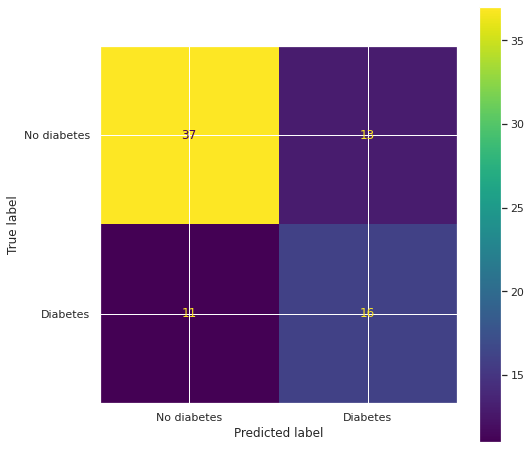

In [ ]:
plot_confusion_matrix(gridsearch.best_estimator_, X_test, y_test, display_labels= ['No diabetes', 'Diabetes']);

In [ ]:
from sklearn.metrics import confusion_matrix

Text(48.5, 0.5, 'Actual')

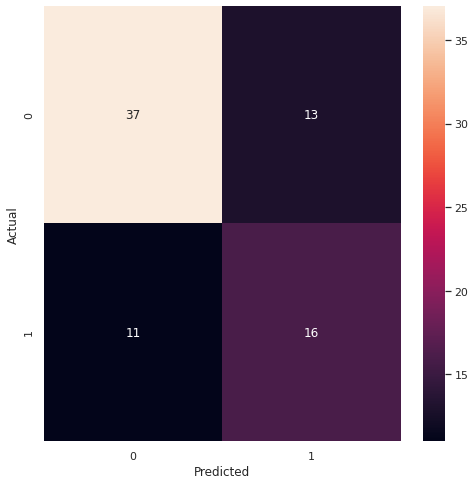

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

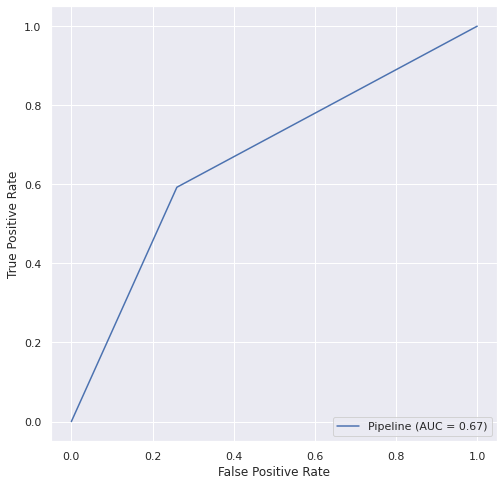

In [ ]:
plot_roc_curve(gridsearch.best_estimator_, X_test, y_test);

##Result Comparison

In [ ]:
y_pred_1 = pd.DataFrame(y_pred,columns= ['Predicted Outcome'])
y_pred_1

,Predicted Outcome
0,1
1,0
2,1
3,0
4,1
...,...
72,0
73,0
74,0
75,0


In [ ]:
y_test_1 = y_test.reset_index()
y_test_1

,index,Outcome
0,424,1
1,677,0
2,399,1
3,208,0
4,539,1
...,...,...
72,82,0
73,470,0
74,85,0
75,381,0


In [ ]:
result = y_test_1.join(y_pred_1)
result.drop('index', axis = 1, inplace = True)

In [ ]:
result

,Outcome,Predicted Outcome
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
72,0,0
73,0,0
74,0,0
75,0,0


In [ ]:
result['comparison'] = [1 if x == y else 0 for x, y in zip(result['Outcome'], result['Predicted Outcome'])]

In [ ]:
result

,Outcome,Predicted Outcome,comparison
0,1,1,1
1,0,0,1
2,1,1,1
3,0,0,1
4,1,1,1
...,...,...,...
72,0,0,1
73,0,0,1
74,0,0,1
75,0,0,1


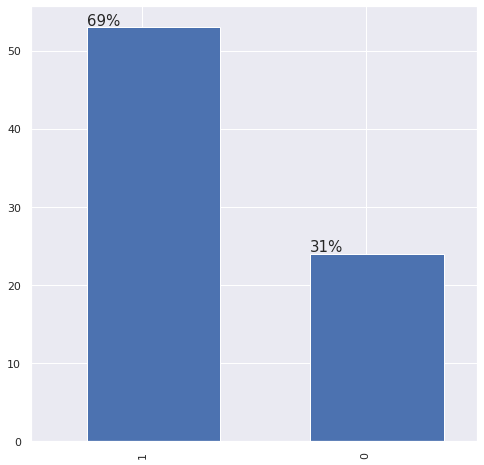

In [ ]:
ax = result['comparison'].value_counts().plot.bar()

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    
    i.set_width(.60)
    
    x, y = i.get_xy()
    
    ax.annotate('{:.0%}'.format(height/77), (x, y + height + 0.3)).set_fontsize(15) 


##Conclusion

Based on Performance of the model, it shows that only 69% of the out-of-sample dataset were accurately classified. Therefore, we either need more dataset to retrain the model or we need to try another model... 

##Business Consequences

Let us assume the cost of Fp is 10 times the cost of Fn, therefore, the company XY future will look thus:

In [ ]:
def compute_cost(cost_fn = 0, cost_fp = 10):
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
    return (cost_fn * fn + cost_fp * fp)

In [ ]:
print('The cost of the False positives to the company is $', compute_cost())

The cost of the False positives to the company is $ 110
